# OpenReview Network Effects

In [2]:
from common import load_dataset, prestigious

import matplotlib.pyplot as plt
import networkx as nx

In [3]:
all_authors, papers, reviews, confs = load_dataset()

In [4]:
i = 0
email_to_id = {}
name_to_id = {}

for a in all_authors:
    email = a['email']
    name = a['name']
    if email in email_to_id:
        id = email_to_id[email]
        name_to_id[name] = id
    elif name in name_to_id:
        id = name_to_id[name]
        email_to_id[email] = id
    else:
        email_to_id[email] = i
        name_to_id[name] = i
        i += 1

In [5]:
G = nx.Graph()

In [6]:
for p in papers:
    for i, a in enumerate(p['authors']):
        G.add_node(a)
        prestige = prestigious(all_authors[p['author_keys'][i]]) if p['author_keys'][i] else False
        if prestige:
            # bright pink
            G.node[a]['viz'] = {'color': {'r': 188, 'g': 98, 'b': 151, 'a': 0}}
        else:
            # rgb(98,188,135)
            G.node[a]['viz'] = {'color': {'r': 98, 'g': 188, 'b': 135, 'a': 0}}
            
        edges = [(a, x) for x in p['authors'] if x != a]
        G.add_edges_from(edges)  

## Connectivity Summary

In [7]:
# print("Average node connectivity: ", nx.average_node_connectivity(G))
print("Number of connected components: ", nx.number_connected_components(G))

Number of connected components:  666


## Graph Visualization

![authors.png](authors.png)

/homes/iws/kayali/.cache/pypoetry/virtualenvs/jupyterlab-py3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


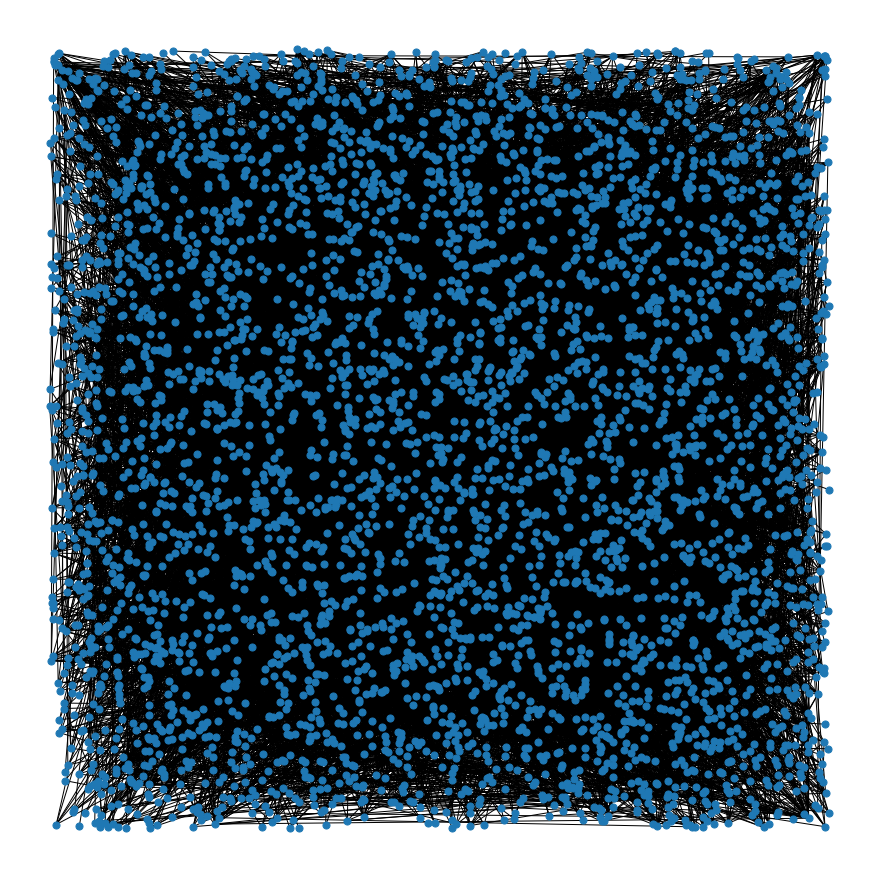

In [8]:
plt.figure(1,figsize=(12,12)) 
nx.draw_random(G, node_size=50,font_size=8, with_labels=False)

it's art!

In [9]:
G = nx.line_graph(G)
nx.write_gexf(G, "line-graph.gexf", version="1.2draft")